## 1. Importimi librarive dhe leximi i te dhenave

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
ftg = pd.read_excel('UCL_playerstats_.xlsx')

In [5]:
ftg.head()

,PlayerID,Player,Position,Age,Nationality,Team,Competitions,Phase,Phase_Tier,Value10^6,...,Balls_recovered,Tackles_Won,Tackles_Lost,Saves,Goals_Conceded,Clean_Sheets,MOTM_Awards,Minutes_played,Match_played,DNP
0,1,Theo Hernandez,Defender,27,France,Milan,Serie A,Knockout_phase,D,40.0,...,53,2,5,0,0,0,0,861,10,0
1,2,Nicolo Barella,Midfielder,28,Italy,Inter,Serie A,Final,S,80.0,...,29,7,13,0,0,0,2,904,12,2
2,3,Lewandowski,Forward,36,Poland,Barcelona,La Liga,Semi_finals,A,15.0,...,11,4,1,0,0,0,2,985,13,1
3,4,Raphinha,Forward,28,Brazil,Barcelona,La Liga,Semi_finals,A,80.0,...,18,2,7,0,0,0,3,1225,14,0
4,5,Van Dijk,Defender,33,Netherlands,Liverpool FC,Premier League,Round16,C,50.0,...,51,3,3,0,0,0,0,840,9,1


## 2. Mean, Median, Mode, Std

#### Rikthen mesataren e seciles kolone me metoden `mean()`

In [16]:
print("Mesatarja")
mean_ftg = ftg.mean(numeric_only=True).add_suffix('_mesatarja')

mean_ftg


Mesatarja


PlayerID_mesatarja               105.500000
Age_mesatarja                     26.780952
Value10^6_mesatarja               39.684524
Jersey_Num_mesatarja              17.700000
Rating_mesatarja                   7.234381
Goals_mesatarja                    1.800000
Assists_mesatarja                  1.328571
TopSpeed(km/h)_mesatarja          32.468095
DistanceCovered(km)_mesatarja     85.904286
Total_attempts_mesatarja          12.533333
Dribbles_mesatarja                13.842857
Passes_completed_mesatarja       360.695238
Key_passes_mesatarja              10.000000
Chances_Created_mesatarja          9.885714
Balls_recovered_mesatarja         29.390476
Tackles_Won_mesatarja              4.547619
Tackles_Lost_mesatarja             6.014286
Saves_mesatarja                    3.204762
Goals_Conceded_mesatarja           1.242857
Clean_Sheets_mesatarja             0.271429
MOTM_Awards_mesatarja              0.614286
Minutes_played_mesatarja         789.380952
Match_played_mesatarja          

In [77]:
print("Mesatarja per Kolonat:")
print(ftg[['Goals', 'Assists', 'Rating', 'Minutes_played']].mean())

Mesatarja per Kolonat:
Goals               1.800000
Assists             1.328571
Rating              7.234381
Minutes_played    789.380952
dtype: float64


In [86]:
print("A kan mesatare me te lart te Rating mesfushoret apo sulmuesit ose pozicionet tjera")
ftg.groupby('Position')[['Goals', 'Assists', 'Rating', 'MOTM_Awards']].mean()

A kan mesatare me te lart te Rating mesfushoret apo sulmuesit ose pozicionet tjera?


,Goals,Assists,Rating,MOTM_Awards
Position,,,,
Defender,0.700000,0.966667,7.162667,0.250000
Forward,3.921875,1.796875,7.305937,1.062500
Goalkeeper,0.000000,0.000000,7.215500,0.350000
Midfielder,1.261538,1.615385,7.234769,0.584615
Midfielder,3.000000,1.000000,7.310000,1.000000


#### Rikthen mesataren e seciles kolone me metoden `median()`

In [23]:
ftg.median(numeric_only=True)

PlayerID               105.50
Age                     26.00
Value10^6               30.00
Jersey_Num              12.50
Rating                   7.18
Goals                    1.00
Assists                  1.00
TopSpeed(km/h)          32.90
DistanceCovered(km)     86.55
Total_attempts          10.00
Dribbles                 9.00
Passes_completed       316.00
Key_passes               9.00
Chances_Created          9.00
Balls_recovered         25.50
Tackles_Won              3.00
Tackles_Lost             5.00
Saves                    0.00
Goals_Conceded           0.00
Clean_Sheets             0.00
MOTM_Awards              0.00
Minutes_played         777.50
Match_played            10.00
DNP                      1.00
dtype: float64

#### Metoda `moda()` per nacionalitetin me te shpeshte te lojtarëve ne champions league

In [87]:
print("(vlera më e shpeshta) Moda per nacionalitetin:")
ftg['Nationality'].mode()

(vlera më e shpeshta) Moda per nacionalitetin:


0    France
Name: Nationality, dtype: object

#### Rikthen mesataren e seciles kolone me metoden `std()`

In [51]:
ftg.std(numeric_only=True).transpose()

PlayerID                60.765944
Age                      4.416110
Value10^6               36.107141
Jersey_Num              16.084124
Rating                   0.244389
Goals                    2.417639
Assists                  1.467884
TopSpeed(km/h)           2.454014
DistanceCovered(km)     31.080178
Total_attempts          11.123118
Dribbles                16.162721
Passes_completed       211.081114
Key_passes               7.740405
Chances_Created          7.665637
Balls_recovered         22.494442
Tackles_Won              4.546424
Tackles_Lost             4.784823
Saves                   10.354990
Goals_Conceded           4.112424
Clean_Sheets             1.001264
MOTM_Awards              0.863278
Minutes_played         228.913572
Match_played             2.351350
DNP                      1.752621
dtype: float64

#### Korrelacioni

In [96]:
print("Sa lidhet numri i golave me vlersimin e lojtarit")
ftg['Goals'].corr(ftg['Rating'])

Sa lidhet numri i golave me vlersimin e lojtarit


np.float64(0.5928900293916031)

#### Vizualizimi me HeatMap

In [110]:
corr_matrix = ftg.corr(numeric_only=True)

corr_positions = ftg.groupby('Position')[['Goals', 'Assists','MOTM_Awards']].corr(numeric_only=True)

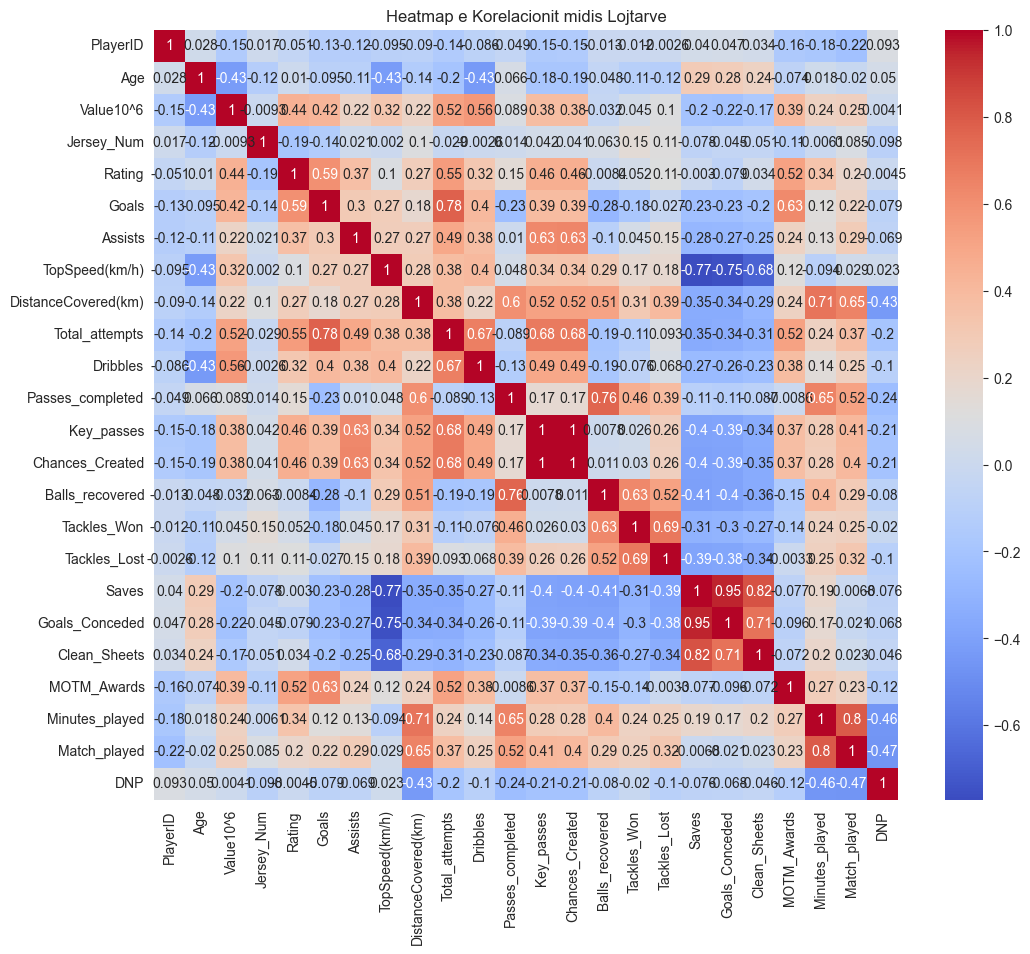

In [105]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap e Korelacionit midis Lojtarve")
plt.show()

In [122]:
corr_g_r = ftg['Goals'].corr(ftg['Rating'])

print(f"Korelacioni mes Goalve dhe Rating(Vlersimit): {corr_g_r:.2f}")

Korelacioni mes Goalve dhe Rating(Vlersimit): 0.59


In [128]:
fig = px.scatter(
    ftg,
    x='Goals',
    y='Rating',
    title=f'Corr between Goals and Rating (Corr = {corr_g_r:.2f})',
    labels={'Goals': 'Golat', 'Rating': 'Vleresimi'},
    color='Position'
)

fig.show()

In [160]:
defenders = ftg[ftg['Position'] == 'Defender'].sort_values(by='Chances_Created', ascending=False)

defenders[['Player','Chances_Created','Assists']]

,Player,Chances_Created,Assists
12,Hakimi,34,5
54,Grimaldo,22,2
69,Ryerson,18,0
20,Frimpong,17,5
101,De Cuyper,17,0
29,Dimarco,16,2
192,Laimer,15,1
21,Rico Lewis,15,1
204,Kenny Lala,14,0
122,Alvaro Carreras,13,2


In [165]:
fig = px.bar(
    defenders.sort_values(by='Chances_Created', ascending=False).head(10),  # 10 mbrojtësit me më shumë gola
    x='Player',
    y='Chances_Created',
    color='Assists',
    title='Top 10 Defender me se Shumti Shanse te Krijuar (ngjyra tregon Assistat)'
)
fig.show()

In [192]:
defenders2 = ftg[(ftg['Position'] == 'Defender') & (ftg['Chances_Created'] >= 10)].copy()

defenders2['Assist_Effectiveness'] = defenders2.apply(
    lambda row: row['Assists'] / row['Chances_Created'],
    axis=1
)



<bound method DataFrame.sort_values of               Player  Chances_Created  Assists  Assist_Effectiveness
40            Kounde               10        3              0.300000
20          Frimpong               17        5              0.294118
122  Alvaro Carreras               13        2              0.153846
12            Hakimi               34        5              0.147059
29           Dimarco               16        2              0.125000
54          Grimaldo               22        2              0.090909
21        Rico Lewis               15        1              0.066667
192           Laimer               15        1              0.066667
0     Theo Hernandez               12        0              0.000000
77   Alphonso Davies               12        0              0.000000>

In [207]:
defender_a_a = defenders2[['Player', 'Chances_Created', 'Assists', 'Assist_Effectiveness']].sort_values(
    by='Assist_Effectiveness',
    ascending=False
).head(8)

In [208]:
defender_a_a

,Player,Chances_Created,Assists,Assist_Effectiveness
40,Kounde,10,3,0.300000
20,Frimpong,17,5,0.294118
122,Alvaro Carreras,13,2,0.153846
12,Hakimi,34,5,0.147059
29,Dimarco,16,2,0.125000
54,Grimaldo,22,2,0.090909
21,Rico Lewis,15,1,0.066667
192,Laimer,15,1,0.066667


In [213]:
fig = px.bar(
    defender_a_a,
    x='Player',
    y='Assist_Effectiveness',
    color='Assists',
    labels={'Assist_Effectiveness': 'Saktesia e asistave'},
    title='Top 8 Defender with Accuray of Assists',
    text='Assists',
    hover_data=['Chances_Created']
)
fig.show()